In [12]:
import sys, glob, os
from commons import convert_to_json, triq_optimization, qiskit_optimization, \
    calibration_type_enum, qiskit_compilation_enum, normalize_counts, calculate_success_rate_tvd, \
    convert_dict_binary_to_int, convert_dict_int_to_binary, sum_last_n_digits_dict
import wrappers.qiskit_wrapper as qiskit_wrapper
from wrappers.qiskit_wrapper import QiskitCircuit
import pandas as pd
import mthree
import mapomatic as mm
import mthree

from qiskit.quantum_info import SparsePauliOp
from qiskit import QuantumCircuit, transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime.options import SamplerOptions, EstimatorOptions, DynamicalDecouplingOptions, TwirlingOptions

from qiskit_aer import AerSimulator, QasmSimulator, Aer
from qiskit.qasm2 import dumps
import matplotlib.pyplot as plt
import numpy as np

from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer.noise import NoiseModel

import mitiq
from mitiq import zne, benchmarks

from qEmQUIP import QEM, conf

In [7]:
QiskitRuntimeService.save_account(channel="ibm_cloud", token="tyF4ya7NOGlq9Ls_JM5JJ0vG0IJmdu_Ea2rc-xTauvJ_", 
                                  instance="ibm_credit", 
                                  name="handy-kurniawan", set_as_default=False, overwrite=True)

service = QiskitRuntimeService(channel="ibm_cloud", token="tyF4ya7NOGlq9Ls_JM5JJ0vG0IJmdu_Ea2rc-xTauvJ_", instance="ibm_credit")

In [8]:
dir(service)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_account',
 '_api_client',
 '_authenticate_ibm_quantum_account',
 '_backend_allowed_list',
 '_channel',
 '_channel_strategy',
 '_check_api_version',
 '_client_params',
 '_create_backend_obj',
 '_decode_job',
 '_discover_account',
 '_discover_cloud_backends',
 '_get_hgp',
 '_initialize_hgps',
 '_resolve_crn',
 '_run',
 '_validate_channel_strategy',
 'active_account',
 'backend',
 'backends',
 'channel',
 'delete_account',
 'delete_job',
 'get_backend',
 'global_service',
 'instances',
 'job',
 'jobs',
 'least_busy',
 'run',
 'save_account',
 'saved_accounts']

In [9]:
service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_fez')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibm_torino')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_statevector')>]

In [117]:
backend = service.backend("ibm_fez")
backend.name

'ibm_fez'

In [118]:
noise_model = NoiseModel.from_backend(backend)

sim_noisy = AerSimulator(configuration=backend.configuration(),
                         properties=backend.properties(),
                                noise_model=noise_model
                                )


In [119]:
circ = QuantumCircuit.from_qasm_file("./circuits/polar_sim/n3/x/polar_all_meas_n3_x.qasm")
circ.draw("mpl", fold=-1)

circ = QuantumCircuit(3,3)
circ.x(0)
circ.cx(0,1)
circ.cx(0,2)
circ.measure(0,0)
circ.measure(1,1)
circ.measure(2,2)




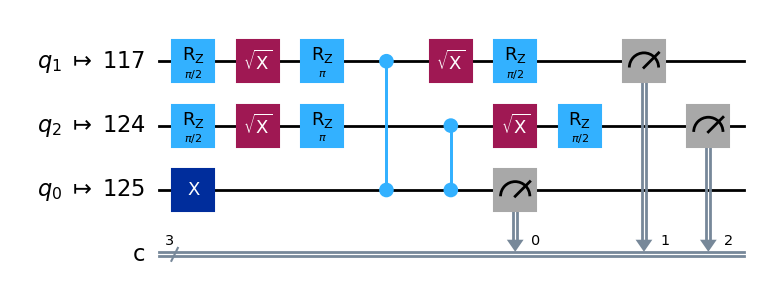

In [120]:
pm = generate_preset_pass_manager(optimization_level=3, backend=sim_noisy)
transpiled_circuit = pm.run(circ)
transpiled_circuit.draw("mpl", idle_wires = False)

In [121]:
result = sim_noisy.run(transpiled_circuit, shots = 10000).result()
output = result.get_counts()

In [122]:
output

{'001': 1, '101': 74, '010': 16, '000': 5, '110': 68, '011': 70, '111': 9766}

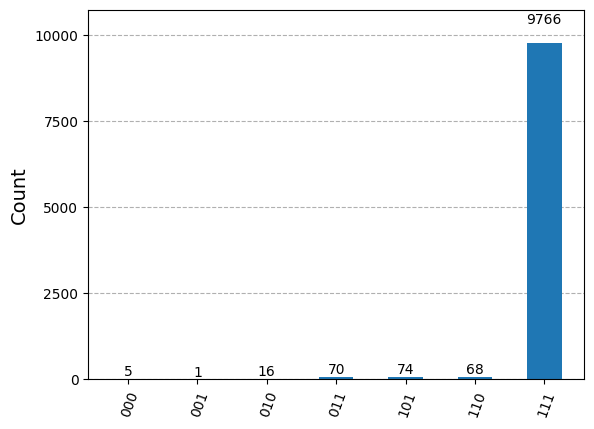

In [123]:
from qiskit.visualization import plot_histogram
plot_histogram(output)